# Task 1: Descriptive Analytics for Numerical Columns

### Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.

### Steps:
1. Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).
2. Identify numerical columns in the dataset.
3. Calculate the mean, median, mode, and standard deviation for these columns.
4. Provide a brief interpretation of these statistics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
df= pd.read_csv('sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [3]:
# Identify numerical columns in the dataset

numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [4]:
# Calculate the mean, median, mode, and standard deviation for these column

summary_stats = pd.DataFrame(columns=['Mean', 'Median', 'Mode', 'Standard Deviation'])

for col in numerical_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0]  # Mode might have multiple values, so we take the first one
    std_val = df[col].std()
    
    summary_stats.loc[col] = [mean_val, median_val, mode_val, std_val]

# Print the summary statistics
print("Summary Statistics for Numerical Columns:")
summary_stats

Summary Statistics for Numerical Columns:


,Mean,Median,Mode,Standard Deviation
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


In [5]:
# Provide a brief interpretation of these statistics.

print("\nInterpretation of Statistics:")
for col in numerical_cols:
    mean_val = summary_stats.loc[col, 'Mean']
    median_val = summary_stats.loc[col, 'Median']
    mode_val = summary_stats.loc[col, 'Mode']
    std_val = summary_stats.loc[col, 'Standard Deviation']
    
    print(f"Column: {col}")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Mode: {mode_val}")
    print(f"  Standard Deviation: {std_val:.2f}")
    print("")


Interpretation of Statistics:
Column: Volume
  Mean: 5.07
  Median: 4.00
  Mode: 3.0
  Standard Deviation: 4.23

Column: Avg Price
  Mean: 10453.43
  Median: 1450.00
  Mode: 400.0
  Standard Deviation: 18079.90

Column: Total Sales Value
  Mean: 33812.84
  Median: 5700.00
  Mode: 24300.0
  Standard Deviation: 50535.07

Column: Discount Rate (%)
  Mean: 15.16
  Median: 16.58
  Mode: 5.007822189204133
  Standard Deviation: 4.22

Column: Discount Amount
  Mean: 3346.50
  Median: 988.93
  Mode: 69.17794228822787
  Standard Deviation: 4509.90

Column: Net Sales Value
  Mean: 30466.34
  Median: 4677.79
  Mode: 326.97480055470817
  Standard Deviation: 46358.66



#### Interpretation

1. Distribution Shape: Most columns (Volume, Avg Price, Total Sales Value, Discount Rate, Discount Amount, Net Sales Value) exhibit skewness towards lower values, as indicated by medians significantly lower than means.
2. Variability: The standard deviations for Avg Price, Total Sales Value, and Net Sales Value are relatively large, indicating considerable variability in these metrics.
3. Central Tendency: Modes provide insights into the most frequent values observed in each column, which can be useful for understanding typical scenarios or behaviors in the dataset.

# Task 2: Data Visualization

### Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

Q1. Histograms:
1. Plot histograms for each numerical column.
2. Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

Q2. Boxplots:
1. Create boxplots for numerical variables to identify outliers and the interquartile range.
2. Discuss any findings, such as extreme values or unusual distributions.

Q3. Bar Chart Analysis for Categorical Column:
1. Identify categorical columns in the dataset.
2. Create bar charts to visualize the frequency or count of each category.
3. Analyze the distribution of categories and provide insights.

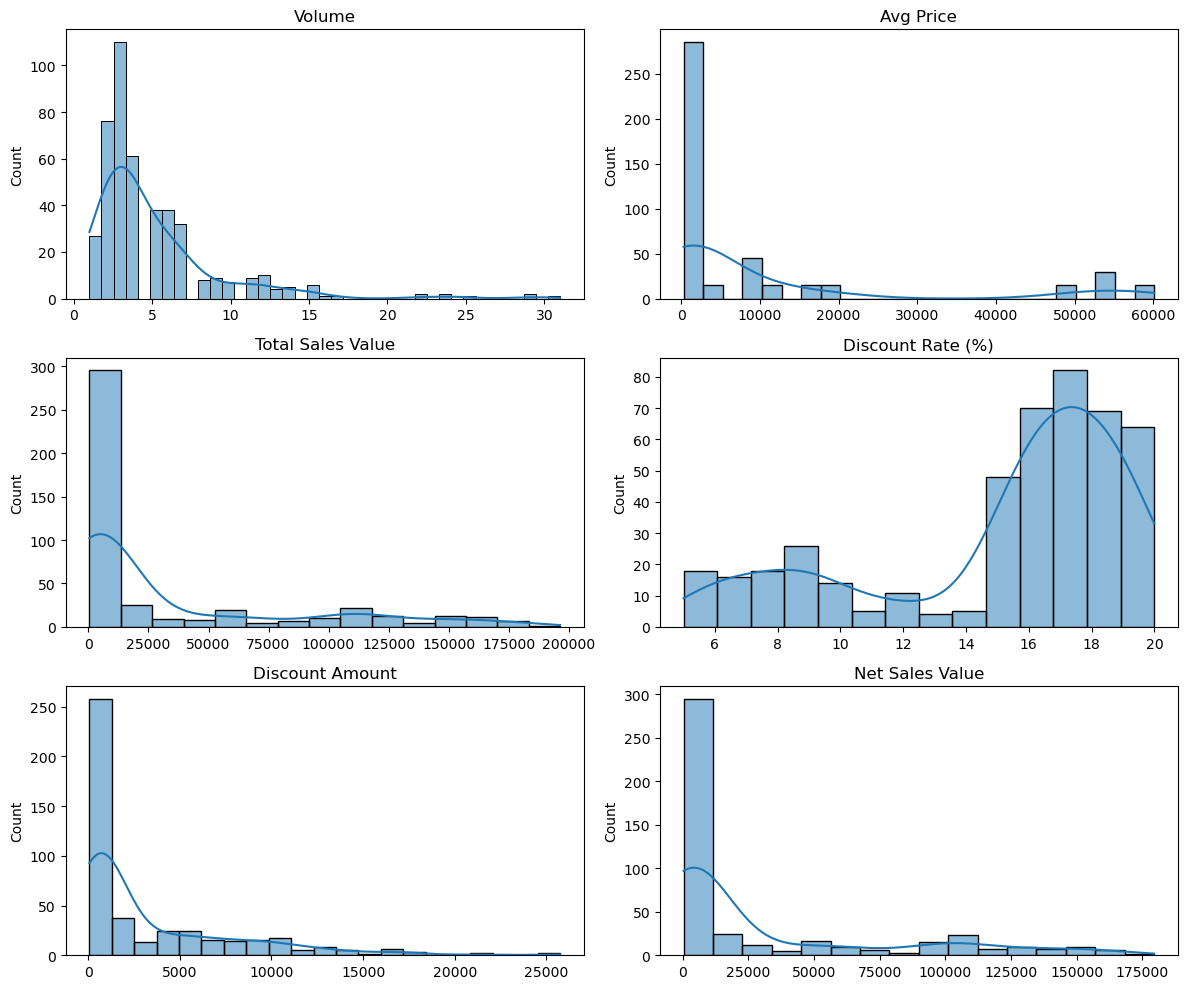

In [7]:
# Plot histograms for each numerical column
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [8]:
# Analyze distribution (skewness, outliers)
print("\nDistribution Analysis:")
for col in numerical_cols:
    skewness = df[col].skew()
    outliers = df[(df[col] < df[col].quantile(0.05)) | (df[col] > df[col].quantile(0.95))]
    print(f"Column: {col}")
    print(f"  Skewness: {skewness:.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    print("")


Distribution Analysis:
Column: Volume
  Skewness: 2.73
  Number of outliers: 21

Column: Avg Price
  Skewness: 1.91
  Number of outliers: 30

Column: Total Sales Value
  Skewness: 1.53
  Number of outliers: 42

Column: Discount Rate (%)
  Skewness: -1.06
  Number of outliers: 46

Column: Discount Amount
  Skewness: 1.91
  Number of outliers: 46

Column: Net Sales Value
  Skewness: 1.54
  Number of outliers: 46



In [9]:
# Boxplots

df= pd.read_csv('sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


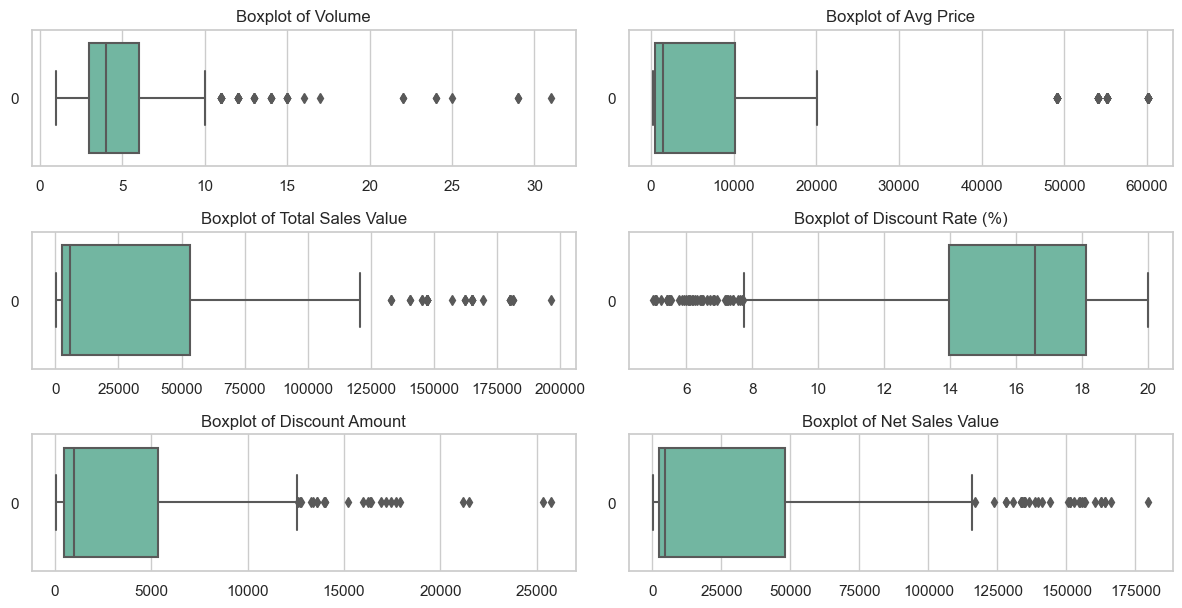

In [10]:
# Create boxplots for numerical variables to identify outliers and the interquartile range.

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i + 1)
    sns.boxplot(data=df[col], orient='h', palette='Set2')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [11]:
# Discuss any findings, such as extreme values or unusual distributions.

print("\nFindings from Boxplots:")

for col in numerical_cols:
    quartiles = df[col].quantile([0.25, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - 1.5 * IQR
    upper_bound = quartiles[0.75] + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\nColumn: {col}")
    print(f"  Interquartile Range (IQR): {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  Outliers: {outliers[col].tolist()}")


Findings from Boxplots:

Column: Volume
  Interquartile Range (IQR): 3.00
  Lower Bound: -1.50
  Upper Bound: 10.50
  Number of outliers: 44
  Outliers: [15, 13, 11, 29, 13, 24, 14, 12, 25, 15, 11, 15, 14, 12, 12, 12, 22, 11, 11, 12, 12, 14, 11, 11, 15, 31, 12, 16, 24, 11, 12, 12, 22, 11, 13, 15, 12, 14, 14, 11, 29, 15, 13, 17]

Column: Avg Price
  Interquartile Range (IQR): 9635.00
  Lower Bound: -13987.50
  Upper Bound: 24552.50
  Number of outliers: 60
  Outliers: [49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100, 49100, 54100, 55100, 60100]

Column: Total Sales Value
  Interquartile Range (IQR): 50500.00
  Lower Bound: -73050.00
  Upper Bound: 1

#### Key Findings

1. Outliers: Across all metrics, there are significant numbers of outliers, particularly in Avg Price, Total Sales Value, Discount Rate, Discount Amount, and Net Sales Value. These outliers suggest instances where the data deviates markedly from the typical patterns, potentially indicating unique business situations, errors, or anomalies in data collection.
2. Impact: Understanding and addressing outliers is crucial for accurate analysis and decision-making. While outliers can provide valuable insights into exceptional performance or issues, they can also skew statistical measures and trends if not properly managed.

In [12]:
# Bar Chart Analysis for Categorical Column:

df= pd.read_csv('sales_data_with_discounts.csv')

# Identify categorical columns

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

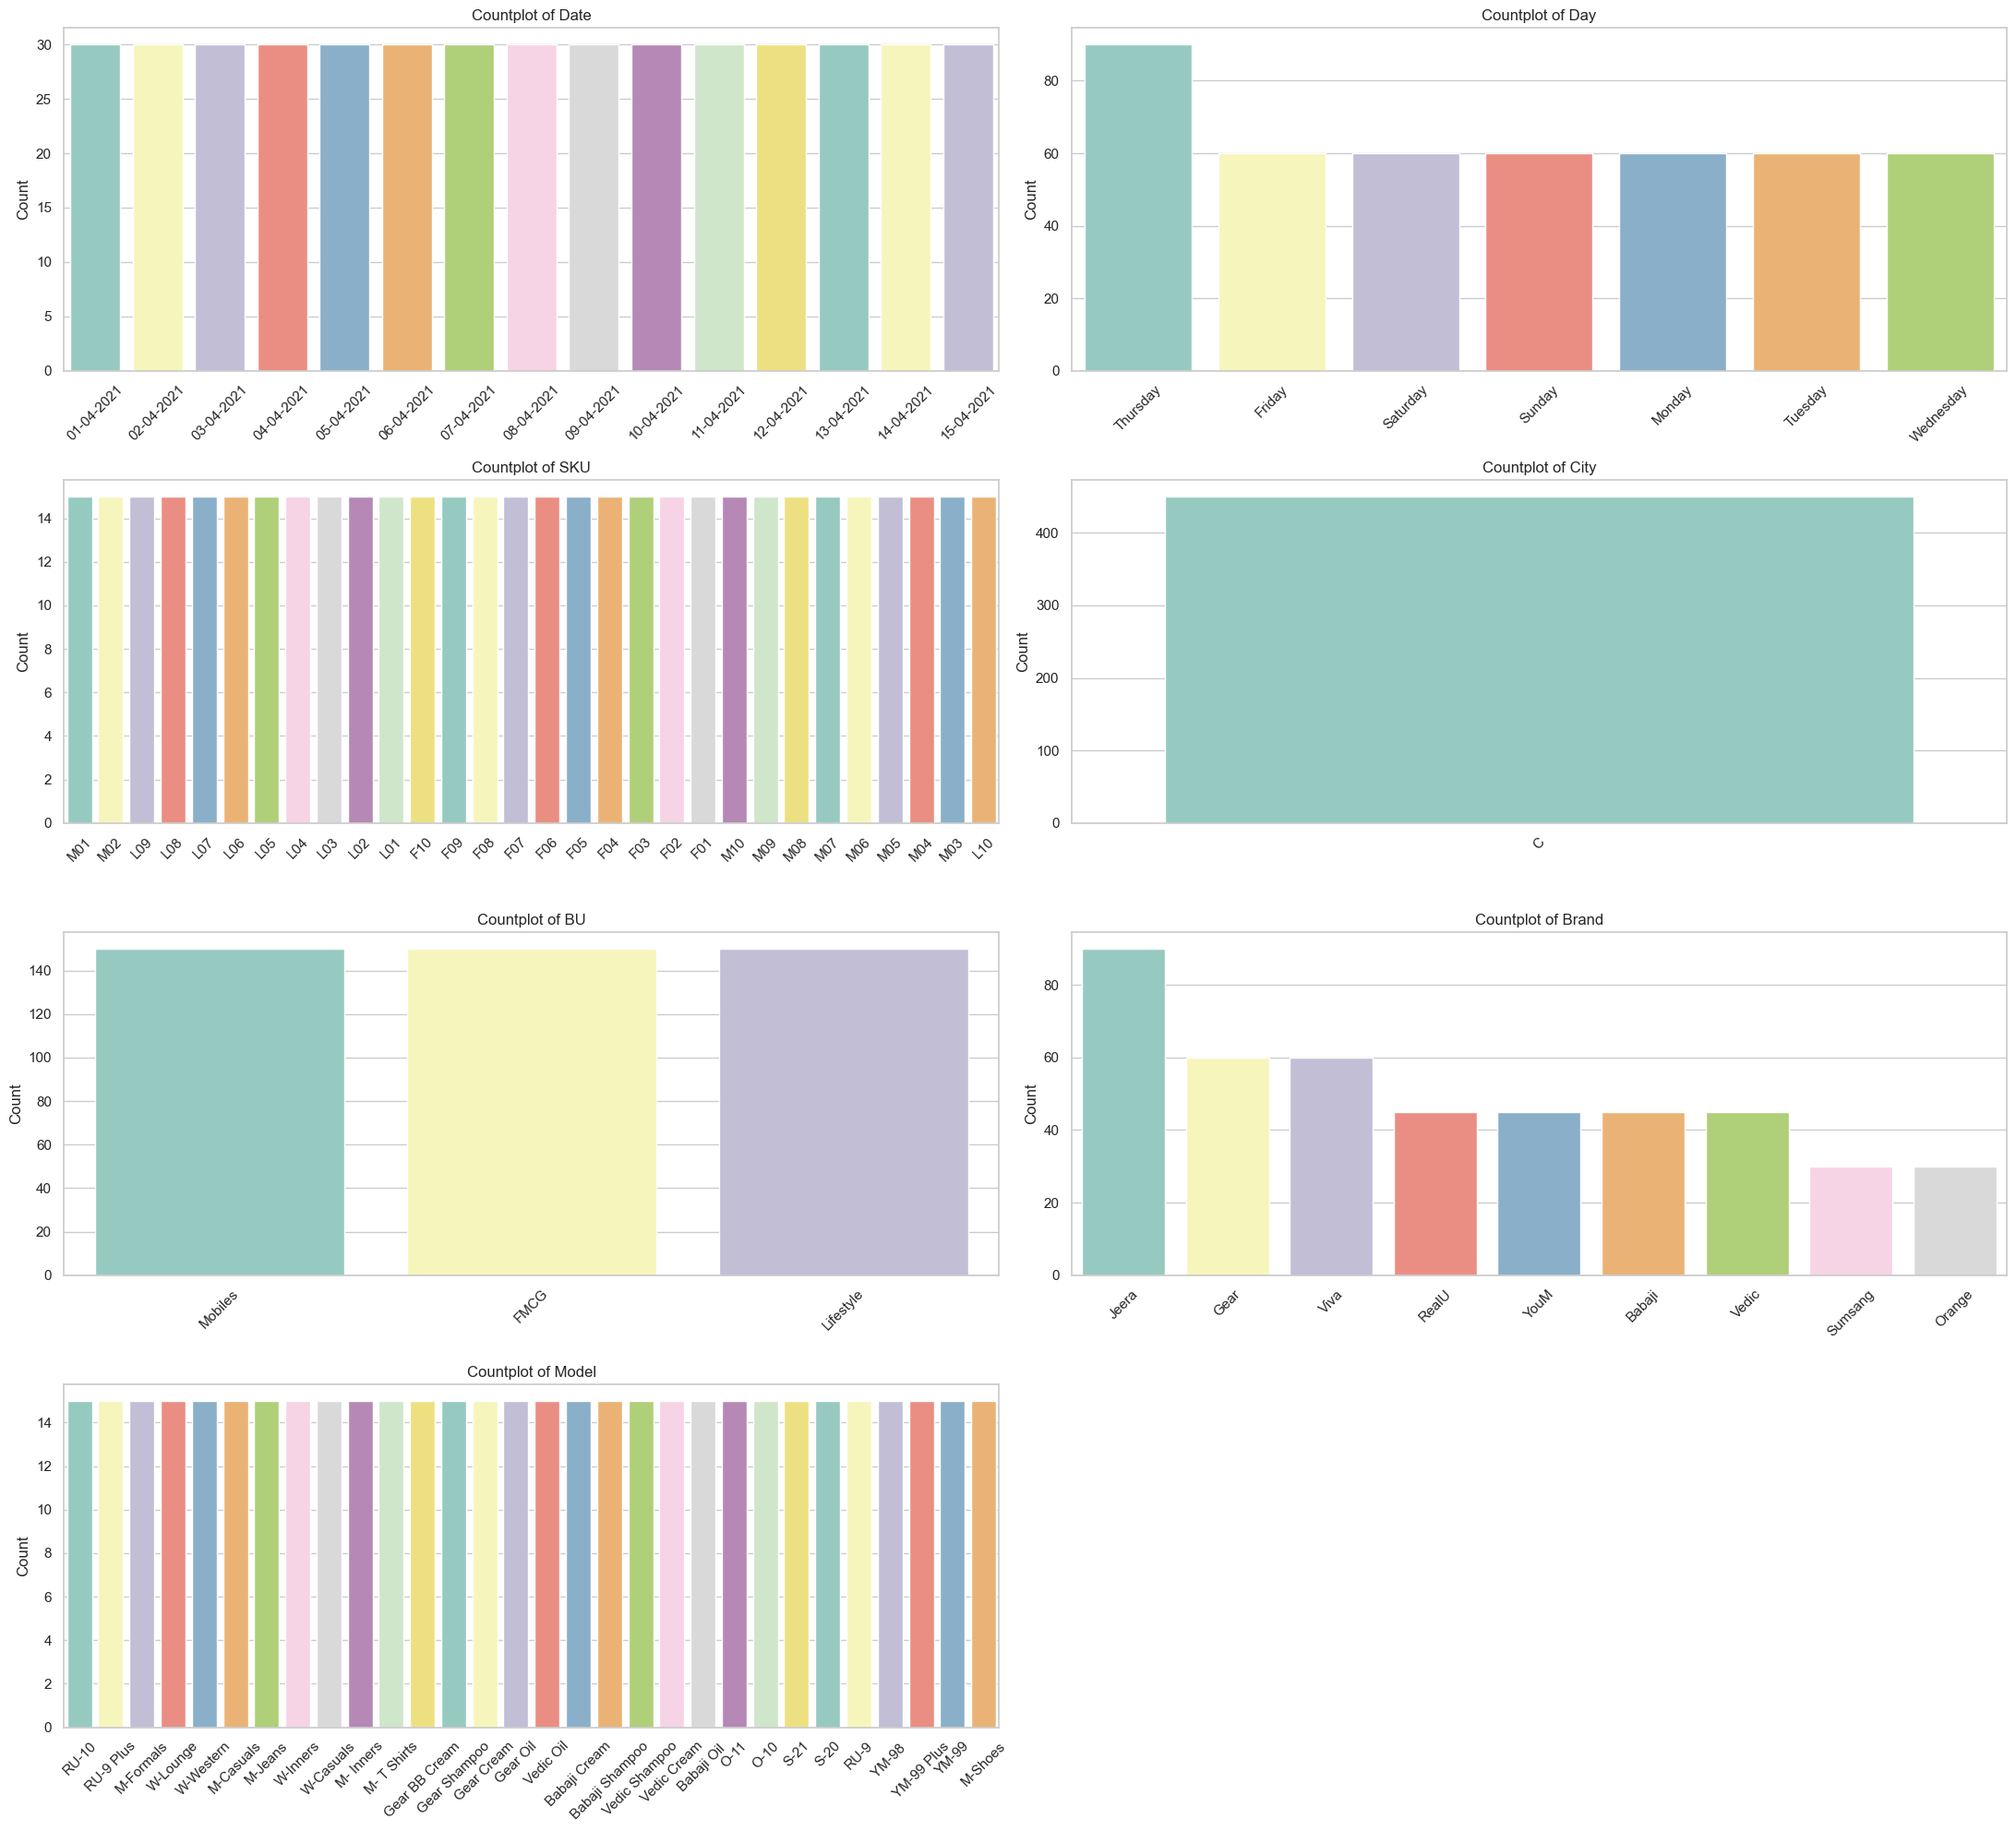

In [13]:
# Create bar charts to visualize the frequency or count of each category.

plt.figure(figsize=(22, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols) // 2 + 1, 2, i + 1)
    sns.countplot(data=df, x=col, palette='Set3', order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Analyze the distribution of categories and provide insights.
print("\nDistribution of Categories Analysis:")

for col in categorical_cols:
    category_counts = df[col].value_counts(normalize=True)
    print(f"\nColumn: {col}")
    print(category_counts)
    print("")

print("\nInsights from Category Distribution:")
for col in categorical_cols:
    unique_categories = df[col].nunique()
    print(f"\nColumn: {col}")
    print(f"  Number of unique categories: {unique_categories}")
    if unique_categories <= 10:
        print(f"  Categories: {df[col].unique()}")
    print("")


Distribution of Categories Analysis:

Column: Date
Date
01-04-2021    0.066667
02-04-2021    0.066667
03-04-2021    0.066667
04-04-2021    0.066667
05-04-2021    0.066667
06-04-2021    0.066667
07-04-2021    0.066667
08-04-2021    0.066667
09-04-2021    0.066667
10-04-2021    0.066667
11-04-2021    0.066667
12-04-2021    0.066667
13-04-2021    0.066667
14-04-2021    0.066667
15-04-2021    0.066667
Name: proportion, dtype: float64


Column: Day
Day
Thursday     0.200000
Friday       0.133333
Saturday     0.133333
Sunday       0.133333
Monday       0.133333
Tuesday      0.133333
Wednesday    0.133333
Name: proportion, dtype: float64


Column: SKU
SKU
M01    0.033333
M02    0.033333
L09    0.033333
L08    0.033333
L07    0.033333
L06    0.033333
L05    0.033333
L04    0.033333
L03    0.033333
L02    0.033333
L01    0.033333
F10    0.033333
F09    0.033333
F08    0.033333
F07    0.033333
F06    0.033333
F05    0.033333
F04    0.033333
F03    0.033333
F02    0.033333
F01    0.033333
M10   

# Task 3: Standardization of Numerical Variables

### Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.

### Steps:
1. Explain the concept of standardization (z-score normalization).
2. Standardize the numerical columns using the formula: z=x-mu/sigma
3. Show before and after comparisons of the data distributions.

#### Standardization (z-score normalization)

Standardization, also known as z-score normalization or z-score standardization, is a technique used in statistics and data science to transform data into a standard normal distribution. It involves transforming the data such that it has a mean of 0 and a standard deviation of 1. This transformation is particularly useful when working with datasets that have different scales or units of measurement.

#### Steps Involved in Standardization
1. Calculate the Mean and Standard Deviation: For each feature (column) in the dataset, calculate the mean 𝜇 and standard deviation 𝜎.
2. Standardize the Data: For each data point 𝑥(𝑖) in the feature: 𝑧(𝑖) = (𝑥(𝑖)−𝜇)/𝜎

#### Benefits of Standardization
1. Mean Centering: Standardization centers the data around 0, which means the transformed data has a mean of 0. This is achieved by subtracting the mean 𝜇 from each data point.
2. Scaling: It scales the data such that the standard deviation 𝜎 becomes 1. This scaling ensures that all features are evaluated on a comparable scale, preventing features with larger ranges from dominating the analysis.
3. Preservation of Distribution Shape: Standardization does not change the shape of the distribution of the data; it only shifts and scales it.
4. Facilitates Comparison: It makes it easier to compare different features or variables because they are transformed to have the same scale.

In [15]:
# Standardize the numerical columns using the formula: z=x-mu/sigma

import pandas as pd
import numpy as np

df= pd.read_csv('sales_data_with_discounts.csv')

# Function to standardize numerical columns
def standardize_column(col):
    mu = col.mean()
    sigma = col.std()
    standardized_col = (col - mu) / sigma
    return standardized_col

# Standardize numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
df_standardized = df.copy() # Create a copy of the DataFrame to store standardized values

for col in numerical_cols:
    df_standardized[col] = standardize_column(df[col])

# Show before and after comparisons of the data distributions.
print("Original DataFrame:")
df

Original DataFrame:


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [16]:
print("\nStandardized DataFrame:")
df_standardized


Standardized DataFrame:


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.347417,Mobiles,RealU,RU-10,0.091072,2.922469,-0.829365,3.948422,2.801638
1,01-04-2021,Thursday,M02,C,1.165831,Mobiles,RealU,RU-9 Plus,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,01-04-2021,Thursday,M03,C,0.456880,Mobiles,YouM,YM-99,0.312312,1.561038,-1.350129,1.621190,1.543957
3,01-04-2021,Thursday,M04,C,0.220563,Mobiles,YouM,YM-99 Plus,0.533552,1.717365,-1.947555,1.112568,1.763847
4,01-04-2021,Thursday,M05,C,-0.488389,Mobiles,YouM,YM-98,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,-0.724706,Lifestyle,Jeera,M-Casuals,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,15-04-2021,Thursday,L07,C,0.220563,Lifestyle,Viva,W-Western,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,15-04-2021,Thursday,L08,C,-0.724706,Lifestyle,Viva,W-Lounge,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,15-04-2021,Thursday,L09,C,-0.488389,Lifestyle,Jeera,M-Formals,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


# Task 4: Conversion of Categorical Data into Dummy Variables

### Objective: To transform categorical variables into a format that can be provided to ML algorithms.

#### Steps:
1. Discuss the need for converting categorical data into dummy variables (one-hot encoding).
2. Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.
3. Display a portion of the transformed dataset.

Converting categorical data into dummy variables, often referred to as one-hot encoding, is a crucial preprocessing step
in many machine learning and statistical modeling tasks. Categorical data represents discrete values that belong to a specific 
category or label. Examples include gender (male, female), city (New York, Chicago, Los Angeles), and educational level (high 
school, college, graduate).

#### Reasons for converting Categorical Data into Dummy Variables (One-Hot Encoding)

1. Algorithm Compatibility: Many machine learning algorithms and statistical models require numerical inputs. They cannot directly handle categorical data in its raw form. One-hot encoding transforms categorical variables into a format that these algorithms can interpret.
2. Preservation of Meaning: One-hot encoding preserves the meaning of categorical variables without assuming any ordinal  relationship between categories. For instance, encoding cities like New York, Chicago, and Los Angeles as 1, 2, and 3  respectively would imply an order, which may not be meaningful.
3. Avoiding Incorrect Implications: Treating categorical data numerically without encoding (e.g., assigning integers to  categories) could inadvertently introduce incorrect assumptions about the relationships between categories. For example,  assigning 1, 2, and 3 to categories like low, medium, and high could imply an ordered relationship where none exists.
4. Improved Model Performance: By using one-hot encoding, models can better understand and utilize categorical data. This can  lead to improved model performance, as it reduces the likelihood of bias and incorrect interpretations due to  misrepresentation of categorical variables.
5. Handling Multiple Categories: Categorical variables with multiple categories (e.g., countries, product categories) benefit  from one-hot encoding because it converts each category into a separate binary feature. This approach ensures that each category contributes independently to the model without assuming any ordinality.

In [18]:
# Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.

df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object', 'category']).columns)

# Display a portion of the transformed dataset.

# Print original and encoded DataFrames for comparison
print("Original DataFrame:")
df

Original DataFrame:


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [19]:
print("\nEncoded DataFrame:")
df_encoded


Encoded DataFrame:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Task 5: Conclusion

Q1. Summarize the key findings from the descriptive analytics and data visualizations.

Q2. Reflect on the importance of data preprocessing steps like standardization and one-hot encoding in data analysis and machine learning.

#### Key findings from the descriptive analytics and data visualizations

1. Skewness: Many of the metrics (average price, total sales value, discount amount, net sales value) exhibit significant skewness towards higher values, as indicated by the differences between mean and median.
2. Variability: Metrics such as average price, total sales value, discount amount, and net sales value show high variability, as reflected by their large standard deviations.
3. Central Tendency: For metrics like volume and discount rate, the mean and median are closer, suggesting more symmetric distributions around these measures.

#### Standardization and one-hot encoding are essential in data analysis and machine learning for the following reasons

1. Standardization: Ensures all features are on a comparable scale (mean of 0 and standard deviation of 1), improving algorithm 
    convergence, fairness in feature comparison, and handling of regularization.
2. One-Hot Encoding: Converts categorical variables into binary vectors, enabling machine learning algorithms to effectively 
    interpret and utilize categorical data without introducing biases from ordinality.
3. Importance: These preprocessing steps enhance model performance by improving accuracy, convergence speed, and robustness. 
    They also ensure data consistency and compatibility across various machine learning algorithms.

In summary, standardization and one-hot encoding are critical for preparing data to maximize model learning capabilities, 
leading to more accurate and reliable insights and decisions in data-driven applications.